# 聚类算法学习手册

## 目录
1. [K-Means 聚类](#kmeans)
2. [DBSCAN 密度聚类](#dbscan)
3. [隐马尔可夫模型 (HMM)](#hmm)
4. [聚类算法对比](#comparison)
5. [高斯混合模型 (GMM)](#gmm)

---

## 1. K-Means 聚类算法 {#kmeans}

### 原理
K-Means 是一种无监督学习算法，通过迭代将数据分配给最近的聚类中心，并更新中心位置，直到收敛。

### 主要特点
- **优点**：算法简单，计算速度快
- **缺点**：需要预先指定簇数k，对初始值敏感
- **适用场景**：球形、规则分布的数据

### 实现示例

K-Means 聚类结果
簇中心:
[[-1.72256762  2.8073623 ]
 [ 1.93204904  0.79614764]
 [ 0.90107601  4.33275275]]
每个簇的样本数: [ 95  99 106]
聚类惯性(Inertia): 367.65



C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\2048493904.py:66: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\2048493904.py:66: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\2048493904.py:66: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\2048493904.py:66: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\2048493904.py:66: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\2048493904.py:66: UserWarning: Glyph 26

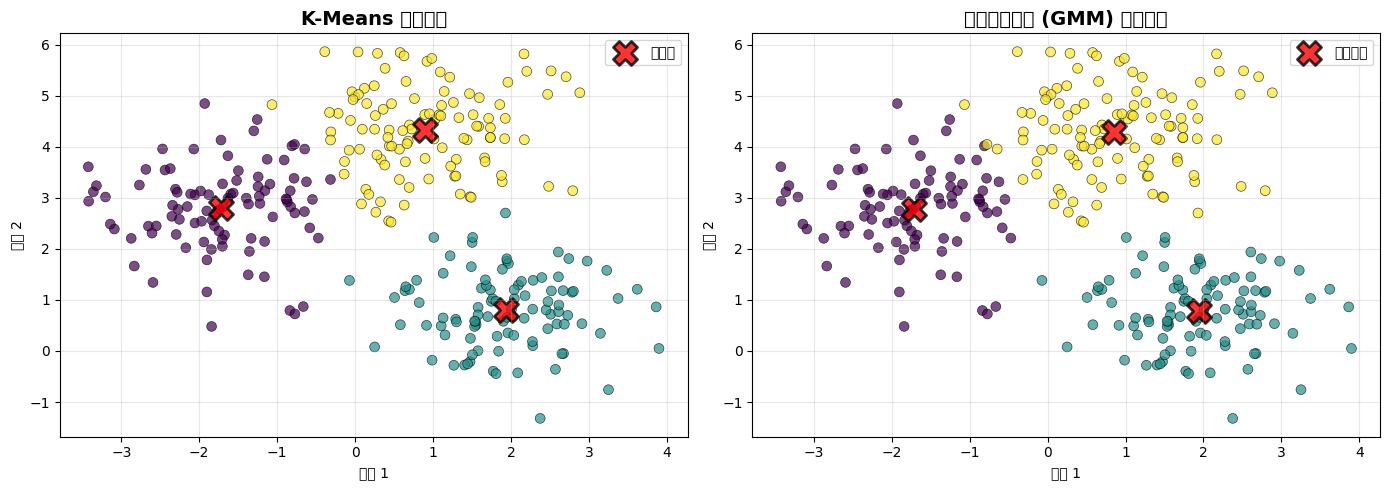

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# --- 1. 生成样本数据 ---
# n_samples: 样本数量
# centers: 簇中心的数量
# cluster_std: 簇的标准差，控制簇的分散程度
# random_state: 随机种子，确保每次生成的数据相同
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=0)

# --- 2. 创建并训练 K-Means 模型 ---
# n_clusters: 指定要创建的簇的数量
# n_init='auto': scikit-learn 推荐的初始化方式
# random_state: 随机种子，确保结果可重现
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)
kmeans.fit(X)

# --- 3. 获取聚类结果 ---
# kmeans.labels_ 包含了每个数据点的簇标签
y_kmeans = kmeans.predict(X)
# kmeans.cluster_centers_ 包含了每个簇的中心点坐标
centers = kmeans.cluster_centers_

# 输出聚类信息
print("K-Means 聚类结果")
print(f"簇中心:\n{centers}")
print(f"每个簇的样本数: {np.bincount(y_kmeans)}")
print(f"聚类惯性(Inertia): {kmeans.inertia_:.2f}\n")

# --- 4. 创建并训练 GMM 模型 ---
# 用于对比，GMM提供更灵活的聚类
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)

# --- 5. 获取聚类结果 ---
y_gmm = gmm.predict(X)
centers_gmm = gmm.means_

# --- 6. 可视化结果 ---
plt.figure(figsize=(14, 5))

# K-Means 结果
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7, edgecolors='k', linewidth=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8, marker='X', edgecolors='black', linewidth=2, label='簇中心')
plt.title("K-Means 聚类结果", fontsize=14, fontweight='bold')
plt.xlabel("特征 1")
plt.ylabel("特征 2")
plt.legend()
plt.grid(True, alpha=0.3)

# GMM 结果
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap='viridis', alpha=0.7, edgecolors='k', linewidth=0.5)
plt.scatter(centers_gmm[:, 0], centers_gmm[:, 1], c='red', s=300, alpha=0.8, marker='X', edgecolors='black', linewidth=2, label='高斯中心')
plt.title("高斯混合模型 (GMM) 聚类结果", fontsize=14, fontweight='bold')
plt.xlabel("特征 1")
plt.ylabel("特征 2")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 2. DBSCAN 密度聚类算法 {#dbscan}

### 原理
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 是一种基于密度的聚类算法，通过寻找高密度区域来识别簇，并将低密度点标记为噪声。

### 主要特点
- **优点**：不需要预先指定簇数，能识别任意形状的簇，能检测噪声
- **缺点**：对参数 (eps, min_samples) 敏感，计算复杂度较高
- **适用场景**：月牙形、环形等非球形簇，数据中包含噪声

### 参数说明
- **eps**：邻域半径，控制相邻点的距离阈值
- **min_samples**：成为核心点所需的最小邻域点数

### 实现示例

DBSCAN 聚类结果
发现的簇数: 2
噪声点数: 0
聚类标签: [0 1]



C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\1003806640.py:62: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\1003806640.py:62: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\1003806640.py:62: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\1003806640.py:62: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\1003806640.py:62: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\YovRen\AppData\Local\Temp\ipykernel_15332\1003806640.py:62: UserWarning: Glyph 26

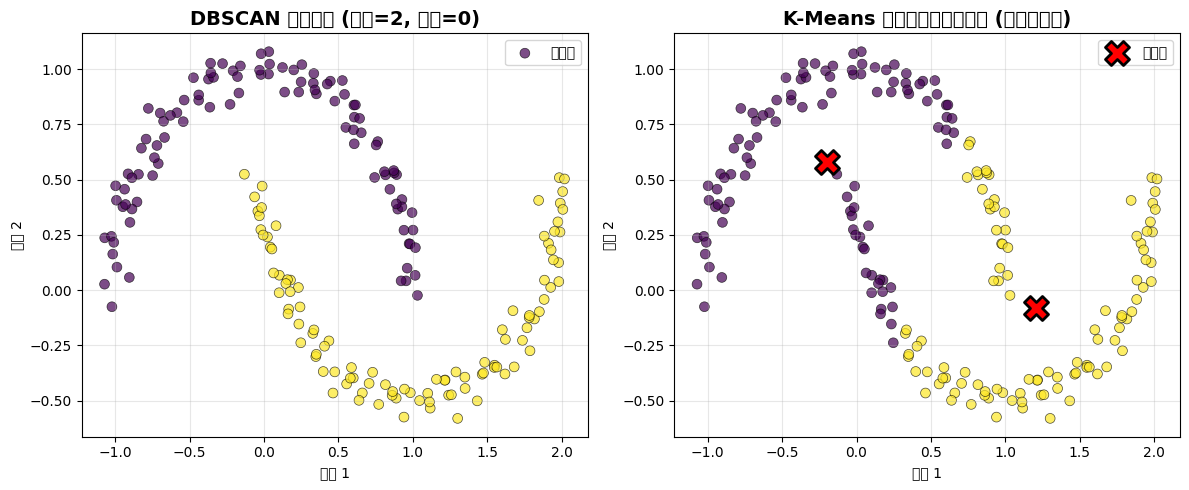

对比分析:
- DBSCAN: 正确识别了月牙形的两个簇
- K-Means: 无法很好处理非凸形状的簇


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# --- 1. 生成样本数据 ---
# make_moons 用于生成月牙形数据，适合展示DBSCAN的优势
# DBSCAN 能很好地处理非球形簇
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# --- 2. 创建并训练 DBSCAN 模型 ---
# eps: 邻域半径 - 两点之间距离在此以内则认为相邻
# min_samples: 成为核心点所需的最小邻域点数 (包括点本身)
# 调整这两个参数可以改变聚类结果
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# --- 3. 获取聚类结果 ---
# 标签为 -1 的点被识别为噪声点
labels = dbscan.labels_
# 获取簇的数量 (忽略噪声点标记 -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("DBSCAN 聚类结果")
print(f"发现的簇数: {n_clusters_}")
print(f"噪声点数: {n_noise}")
print(f"聚类标签: {np.unique(labels)}\n")

# --- 4. 可视化结果 ---
plt.figure(figsize=(12, 5))

# DBSCAN 聚类结果
plt.subplot(1, 2, 1)
# 绘制非噪声点
mask = labels != -1
plt.scatter(X[mask, 0], X[mask, 1], c=labels[mask], s=50, cmap='viridis', alpha=0.7, edgecolors='k', linewidth=0.5, label='聚类点')
# 用红色 X 标记噪声点
if n_noise > 0:
    plt.scatter(X[~mask, 0], X[~mask, 1], c='red', marker='x', s=100, linewidth=2, label='噪声点')
plt.title(f"DBSCAN 聚类结果 (簇数={n_clusters_}, 噪声={n_noise})", fontsize=14, fontweight='bold')
plt.xlabel("特征 1")
plt.ylabel("特征 2")
plt.legend()
plt.grid(True, alpha=0.3)

# 对比：K-Means 在月牙形数据上的效果
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7, edgecolors='k', linewidth=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=300, edgecolors='black', linewidth=2, label='簇中心')
plt.title("K-Means 对月牙形数据的聚类 (效果不理想)", fontsize=14, fontweight='bold')
plt.xlabel("特征 1")
plt.ylabel("特征 2")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("对比分析:")
print("- DBSCAN: 正确识别了月牙形的两个簇")
print("- K-Means: 无法很好处理非凸形状的簇")

---

## 3. 隐马尔可夫模型 (HMM) {#hmm}

### 原理
HMM 是一个统计模型，用于描述一个系统在不同时刻的状态转移过程。它包含：
- **隐状态**：不可直接观测的内部状态 (如天气)
- **观测值**：可以观测到的数据 (如冰淇淋销量)
- **状态转移矩阵**：从一个状态转移到另一个状态的概率
- **观测概率分布**：每个状态产生某个观测值的概率

### 主要应用
- 语音识别
- 自然语言处理 (词性标注、命名实体识别)
- 生物信息学
- 时间序列分析

### 实现示例

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

# --- 1. 定义一个已知的 HMM 模型用于生成数据 ---
# 假设有两个隐藏状态 (例如: "晴天", "雨天")
# 状态转移矩阵: A[i, j] 是从状态 i 转移到状态 j 的概率
transmat = np.array([[0.7, 0.3],  # 晴天: 70%继续晴天, 30%转为下雨
                     [0.4, 0.6]]) # 下雨: 40%转为晴天, 60%继续下雨

# 初始状态概率: 开始时是状态 i 的概率
startprob = np.array([0.5, 0.5])

# 观测概率模型 (高斯分布)
# 每个状态对应一个高斯分布的均值(means)和协方差(covars)
# 假设"晴天"的冰淇淋销量均值是0，"雨天"的销量均值是5
means = np.array([[0.0], [5.0]])
covars = np.array([[1.5], [2.0]])  # 形状是 (n_components, n_features)

# 创建一个高斯HMM模型
# covariance_type="diag": 使用对角协方差矩阵
known_model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)
known_model.startprob_ = startprob
known_model.transmat_ = transmat
known_model.means_ = means
known_model.covars_ = covars

# --- 2. 从已知模型生成一个观测序列 ---
# X 是观测序列 (冰淇淋销量), Z 是对应的隐藏状态序列 (我们假装不知道)
X, Z = known_model.sample(n_samples=200)

print("HMM 模型学习")
print(f"真实状态转移矩阵:\n{transmat}\n")
print(f"观测序列前10个值: {X[:10].flatten()}")
print(f"对应的隐状态: {Z[:10]}\n")

# --- 3. 创建一个新的 HMM 模型来学习数据 ---
# 我们只知道有两个隐藏状态，不知道其他参数
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100, random_state=0)
# 用观测序列 X 来训练模型 (EM算法)
model.fit(X)

# --- 4. 使用训练好的模型解码隐藏状态 ---
# 使用Viterbi算法找到最可能的状态序列
Z_predicted = model.predict(X)

# --- 5. 可视化结果 ---
plt.figure(figsize=(14, 6))

# 绘制观测序列和预测的隐状态
plt.subplot(1, 2, 1)
plt.plot(X, 'o-', label="观测值 (冰淇淋销量)", alpha=0.7, markersize=4)
# 用颜色区分隐状态
for state in [0, 1]:
    mask = Z_predicted == state
    plt.scatter(np.where(mask)[0], X[mask], c=['blue', 'red'][state], s=50, 
               label=f'预测状态 {state}', alpha=0.6)
plt.title("HMM 预测的隐状态", fontsize=14, fontweight='bold')
plt.xlabel("时间步")
plt.ylabel("观测值")
plt.legend()
plt.grid(True, alpha=0.3)

# 绘制学到的转移矩阵
plt.subplot(1, 2, 2)
im = plt.imshow(model.transmat_, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)
plt.colorbar(im, label='概率')
plt.title("学习到的状态转移矩阵", fontsize=14, fontweight='bold')
plt.xlabel("目标状态")
plt.ylabel("当前状态")
plt.xticks([0, 1], ['状态0', '状态1'])
plt.yticks([0, 1], ['状态0', '状态1'])
# 在矩阵上显示概率值
for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{model.transmat_[i, j]:.2f}', 
                ha='center', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

print("学习到的参数:")
print(f"转移矩阵:\n{model.transmat_}")
print(f"均值: {model.means_.flatten()}")
print(f"方差: {model.covars_.flatten()}")
print(f"初始状态概率: {model.startprob_}")

ModuleNotFoundError: No module named 'hmmlearn'

---

## 4. 聚类算法对比分析 {#comparison}

### 综合对比

本部分通过在4种不同的数据集上对比K-Means、GMM、DBSCAN三种聚类算法的表现，帮助理解各种算法的优缺点。

#### 数据集类型
1. **标准球状簇** (Standard Blobs): 规则分布的球形簇
2. **各向异性簇** (Anisotropic Blobs): 被拉伸的簇
3. **月牙形** (Moons): 非凸的两个簇
4. **同心圆** (Circles): 环形结构的簇

#### 算法比较
| 算法 | 适用形状 | 需要参数 | 速度 | 噪声处理 |
|------|--------|---------|------|---------|
| K-Means | 球形 | 簇数k | 快 | 不行 |
| GMM | 球形（更灵活） | 分布数 | 中等 | 不行 |
| DBSCAN | 任意形状 | eps, min_samples | 中等 | 很好 |

### 实现示例

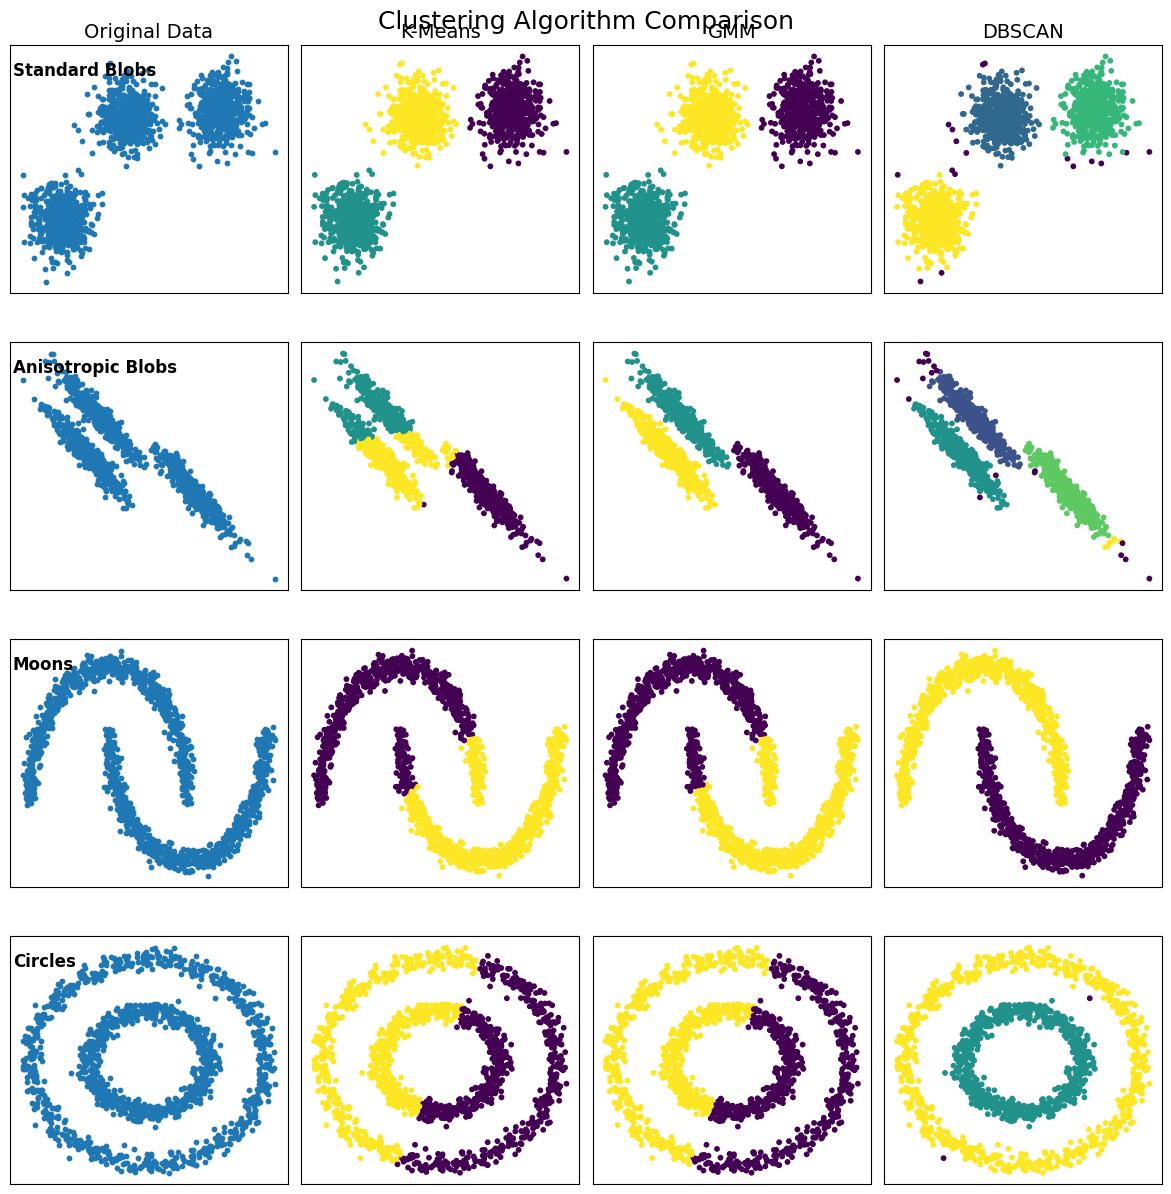

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 1. 生成不同的数据集 ---

n_samples = 1500
random_state = 170

# 数据集1: 标准球状簇
X_blobs, y_blobs = make_blobs(n_samples=n_samples, random_state=random_state)

# 数据集2: 各向异性（拉伸的）簇
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso, y_aniso = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X_aniso, transformation)

# 数据集3: 月牙形
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0.05, random_state=random_state)

# 数据集4: 同心圆
X_circles, y_circles = make_circles(n_samples=n_samples, factor=.5, noise=0.05, random_state=random_state)

# 将所有数据集放入一个列表中，方便迭代
datasets = [
    ("标准球状簇", X_blobs, {'n_clusters': 3}, {'n_components': 3}, {'eps': 0.2}),
    ("各向异性簇", X_aniso, {'n_clusters': 3}, {'n_components': 3}, {'eps': 0.15}),
    ("月牙形", X_moons, {'n_clusters': 2}, {'n_components': 2}, {'eps': 0.2}),
    ("同心圆", X_circles, {'n_clusters': 2}, {'n_components': 2}, {'eps': 0.2})
]

# --- 2. 设置并运行算法 ---

plt.figure(figsize=(16, 14))
plt.subplots_adjust(left=.02, right=.98, bottom=.05, top=.95, wspace=.1, hspace=.3)

plot_num = 1

# 遍历每个数据集
for i, (name, X, kmeans_params, gmm_params, dbscan_params) in enumerate(datasets):
    # 标准化数据，这对DBSCAN的eps参数选择和GMM的性能很重要
    X = StandardScaler().fit_transform(X)

    # 创建算法实例
    kmeans = KMeans(n_clusters=kmeans_params['n_clusters'], n_init='auto', random_state=random_state)
    gmm = GaussianMixture(n_components=gmm_params['n_components'], random_state=random_state)
    dbscan = DBSCAN(eps=dbscan_params['eps'])

    algorithms = [
        ("K-Means", kmeans),
        ("GMM", gmm),
        ("DBSCAN", dbscan)
    ]

    # --- 3. 绘制结果 ---
    
    # 绘制原始数据
    plt.subplot(len(datasets), len(algorithms) + 1, plot_num)
    if i == 0:
        plt.title("原始数据", size=14, fontweight='bold')
    plt.text(0.01, 0.88, name, transform=plt.gca().transAxes, size=12, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.6)
    plt.xticks(())
    plt.yticks(())
    plot_num += 1

    # 绘制每个算法的结果
    for alg_name, algorithm in algorithms:
        plt.subplot(len(datasets), len(algorithms) + 1, plot_num)
        if i == 0:
            plt.title(alg_name, size=14, fontweight='bold')

        # 训练并预测
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        # 绘制聚类结果
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=10, cmap='viridis', alpha=0.6)
        
        # 显示簇中心（如果有）
        if hasattr(algorithm, 'cluster_centers_'):
            plt.scatter(algorithm.cluster_centers_[:, 0], algorithm.cluster_centers_[:, 1],
                       marker='X', s=200, c='red', edgecolors='black', linewidth=1.5)
        elif hasattr(algorithm, 'means_'):
            plt.scatter(algorithm.means_[:, 0], algorithm.means_[:, 1],
                       marker='+', s=300, c='red', linewidth=2)
        
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.suptitle("聚类算法对比分析：在不同数据分布上的表现", size=18, fontweight='bold', y=0.995)
plt.show()

print("\n" + "="*60)
print("算法选择建议:")
print("="*60)
print("✓ 球状数据 → K-Means (快速) 或 GMM (更灵活)")
print("✓ 非凸簇数据 → DBSCAN")
print("✓ 包含噪声数据 → DBSCAN")
print("✓ 需要概率信息 → GMM")
print("✓ 数据点密度差异大 → DBSCAN")

In [ ]:
"""
## 7. 决策树 (Decision Tree) - 信息增益划分

### 问题描述
实现一个基于信息增益的决策树分类器。

### 核心概念
- **信息熵**: 衡量集合中数据的不纯度
  - H(S) = -Σ p_i * log2(p_i)
  
- **信息增益**: 选择特征后熵的减少量
  - IG(S, A) = H(S) - Σ |S_v|/|S| * H(S_v)
  
- **贪心策略**: 每次选择信息增益最大的特征进行划分

### 树的构建过程
1. 如果所有样本标签相同，创建叶子节点
2. 计算每个特征的信息增益
3. 选择增益最大的特征进行划分
4. 递归构建左右子树

### 复杂度
- 训练: O(n * m * log(n)) - n样本，m特征
- 预测: O(log(n))
"""

import sys
import math
from collections import Counter

def calculate_entropy(data):
    """
    计算数据集的信息熵
    
    Args:
        data: [[特征1, 特征2, ..., 标签], ...]
        
    Returns:
        float: 熵值
    """
    if not data:
        return 0
    labels = [row[-1] for row in data]
    total_count = len(labels)
    if total_count == 0:
        return 0

    label_counts = Counter(labels)
    entropy = 0.0
    for count in label_counts.values():
        prob = count / total_count
        entropy -= prob * math.log2(prob)
    return entropy

def get_majority_label(data):
    """获取数据集中的多数标签"""
    labels = [row[-1] for row in data]
    if not labels:
        return 0
    counts = Counter(labels)
    if counts.get(0, 0) == counts.get(1, 0):
        return 0
    return counts.most_common(1)[0][0]

class TreeNode:
    def __init__(self, feature_index=None, label=None):
        self.feature_index = feature_index  # 用于划分的特征索引
        self.label = label  # 叶子节点的类标签
        self.children = {}  # 子节点: {特征值: TreeNode}

def build_decision_tree(data, features_indices):
    """递归构建决策树"""
    labels = [row[-1] for row in data]

    # 基准情况1: 所有样本标签相同
    if len(set(labels)) == 1:
        return TreeNode(label=labels[0])

    # 基准情况2: 无特征可划分
    if not features_indices:
        return TreeNode(label=get_majority_label(data))

    # 选择最佳划分特征
    base_entropy = calculate_entropy(data)
    best_info_gain = -1.0
    best_feature_index = -1

    for i in features_indices:
        subsets = {0: [], 1: []}
        for row in data:
            subsets[row[i]].append(row)

        if not subsets[0] or not subsets[1]:
            continue

        new_entropy = 0.0
        for val in subsets:
            prob = len(subsets[val]) / len(data)
            new_entropy += prob * calculate_entropy(subsets[val])

        info_gain = base_entropy - new_entropy
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature_index = i

    # 基准情况3: 无法有效划分
    if best_info_gain <= 0:
        return TreeNode(label=get_majority_label(data))

    # 递归构建子树
    node = TreeNode(feature_index=best_feature_index)
    remaining_features = [i for i in features_indices if i != best_feature_index]

    subsets = {0: [], 1: []}
    for row in data:
        subsets[row[best_feature_index]].append(row)

    for val in subsets:
        if not subsets[val]:
            node.children[val] = TreeNode(label=get_majority_label(data))
        else:
            node.children[val] = build_decision_tree(subsets[val], remaining_features)

    return node

def predict(tree, sample):
    """使用决策树进行预测"""
    node = tree
    while node.label is None:
        feature_value = sample[node.feature_index]
        if feature_value in node.children:
            node = node.children[feature_value]
        else:
            return 0
    return node.label

# 测试示例
if __name__ == "__main__":
    # 训练数据: 前两列是特征，最后一列是标签
    training_data = [
        [0, 0, 0], [0, 1, 0], [1, 0, 1],
        [1, 1, 1], [1, 0, 1], [0, 1, 0]
    ]
    features = list(range(2))
    decision_tree = build_decision_tree(training_data, features)
    
    # 测试预测
    test_samples = [[0, 0], [1, 1], [1, 0]]
    for sample in test_samples:
        result = predict(decision_tree, sample)
        print(f"Sample {sample} -> Prediction: {result}")


---

## 5. 高斯混合模型 (GMM) 详解 {#gmm}

### 原理
高斯混合模型 (Gaussian Mixture Model, GMM) 假设数据由多个高斯分布混合而成，每个高斯分布代表一个簇。

### 与K-Means的区别
| 特性 | K-Means | GMM |
|------|---------|-----|
| 聚类方式 | 硬聚类 | 软聚类 |
| 输出 | 每点的簇标签 | 每点属于各簇的概率 |
| 灵活性 | 每个簇同一协方差 | 每个簇可不同协方差 |
| 概率模型 | 否 | 是 |

### EM算法
GMM 使用 EM (Expectation-Maximization) 算法进行训练：
1. **E步**: 根据当前参数计算每个点属于各簇的概率
2. **M步**: 根据概率更新簇的参数
3. 重复直到收敛

### 实现示例

GMM 算法是否收敛: True
------------------------------
真实参数 (分布1):
  均值: 160, 标准差: 5, 权重: 0.375
学习到的参数 (分布1):
  均值: 159.926, 标准差: 5.069, 权重: 0.416
------------------------------
真实参数 (分布2):
  均值: 178, 标准差: 8, 权重: 0.625
学习到的参数 (分布2):
  均值: 178.400, 标准差: 7.633, 权重: 0.584


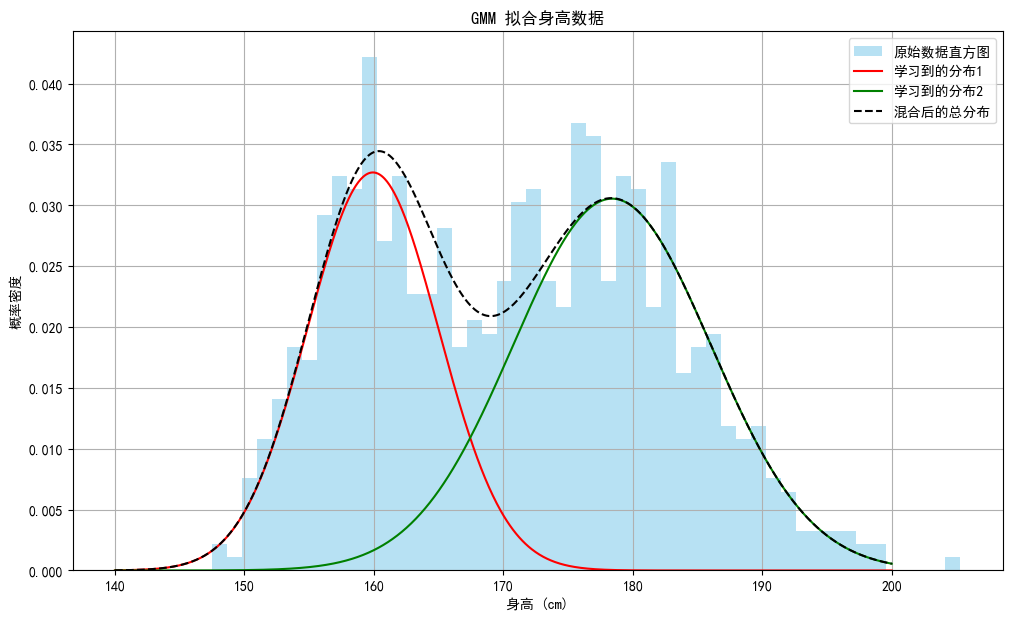


身高为 170 cm 的数据点:
  属于分布1 (均值~159.9) 的概率: 21.39%
  属于分布2 (均值~178.4) 的概率: 78.61%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

# --- 1. 生成样本数据 ---
# 实际场景：测量身高分布，可能包含男女两个群体
print("GMM 实际应用示例：身高分布建模")
print("="*60)

# 分布1 (女生): 均值=160cm, 标准差=5cm, 样本=300个
mean1_true, std1_true, n1 = 160, 5, 300
# 分布2 (男生): 均值=178cm, 标准差=8cm, 样本=500个
mean2_true, std2_true, n2 = 178, 8, 500

# 从这两个分布中采样数据
data1 = np.random.normal(loc=mean1_true, scale=std1_true, size=n1)
data2 = np.random.normal(loc=mean2_true, scale=std2_true, size=n2)

# 将两组数据混合成一个数据集（模拟实际的混合分布）
X = np.concatenate((data1, data2)).reshape(-1, 1)

# --- 2. 创建并训练 GMM 模型 ---
# 我们告诉模型数据中包含2个高斯分布 (n_components=2)
# 模型内部会使用EM算法进行优化
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# --- 3. 检查模型学习到的参数 ---
converged = "✓ 已收敛" if gmm.converged_ else "✗ 未收敛"
print(f"EM算法收敛状态: {converged}")
print(f"对数似然值: {gmm.score(X):.4f}")
print("-" * 60)

# 获取学习到的参数
means_learnt = gmm.means_.flatten()
covars_learnt = np.sqrt(gmm.covariances_.flatten())
weights_learnt = gmm.weights_

# 排序以便于比较
sorted_indices = np.argsort(means_learnt)
means_learnt = means_learnt[sorted_indices]
covars_learnt = covars_learnt[sorted_indices]
weights_learnt = weights_learnt[sorted_indices]

print("真实参数 vs 学习到的参数")
print("-" * 60)
print(f"分布1 (女生/均值较小):")
print(f"  真实:   均值={mean1_true}cm, 标准差={std1_true}cm, 比例={n1/(n1+n2):.1%}")
print(f"  学习:   均值={means_learnt[0]:.2f}cm, 标准差={covars_learnt[0]:.2f}cm, 比例={weights_learnt[0]:.1%}")
print()
print(f"分布2 (男生/均值较大):")
print(f"  真实:   均值={mean2_true}cm, 标准差={std2_true}cm, 比例={n2/(n1+n2):.1%}")
print(f"  学习:   均值={means_learnt[1]:.2f}cm, 标准差={covars_learnt[1]:.2f}cm, 比例={weights_learnt[1]:.1%}")

# --- 4. 可视化结果 ---
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 左图：拟合效果
ax = axes[0]
ax.hist(X, bins=60, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='原始数据直方图')

# 绘制学习到的两个高斯分布曲线
x_axis = np.linspace(140, 200, 1000)
pdf1 = norm.pdf(x_axis, loc=means_learnt[0], scale=covars_learnt[0]) * weights_learnt[0]
pdf2 = norm.pdf(x_axis, loc=means_learnt[1], scale=covars_learnt[1]) * weights_learnt[1]
mixed_pdf = pdf1 + pdf2

ax.plot(x_axis, pdf1, 'r-', linewidth=2.5, label=f'分布1 (μ={means_learnt[0]:.1f})')
ax.plot(x_axis, pdf2, 'g-', linewidth=2.5, label=f'分布2 (μ={means_learnt[1]:.1f})')
ax.plot(x_axis, mixed_pdf, 'k--', linewidth=2, label='混合总分布')

# 标记学到的均值
ax.axvline(means_learnt[0], color='r', linestyle=':', linewidth=2, alpha=0.7)
ax.axvline(means_learnt[1], color='g', linestyle=':', linewidth=2, alpha=0.7)

ax.set_title("GMM 拟合身高数据分布", fontsize=14, fontweight='bold')
ax.set_xlabel("身高 (cm)")
ax.set_ylabel("概率密度")
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# 右图：软聚类可视化
ax = axes[1]
# 计算每个点属于各分布的概率
probabilities = gmm.predict_proba(X)

# 按概率分配颜色（概率越高色彩越饱和）
scatter = ax.scatter(X, range(len(X)), c=probabilities[:, 0], cmap='RdYlGn_r', s=20, alpha=0.7)
ax.axvline(means_learnt[0], color='r', linestyle='--', linewidth=2, label=f'分布1中心')
ax.axvline(means_learnt[1], color='g', linestyle='--', linewidth=2, label=f'分布2中心')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('属于分布1的概率', fontsize=11)
ax.set_title("软聚类：每个点的概率分配", fontsize=14, fontweight='bold')
ax.set_xlabel("身高 (cm)")
ax.set_ylabel("样本索引")
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# --- 5. 应用：预测新样本的归属 ---
print("\n" + "="*60)
print("预测示例：某个新样本的分布归属")
print("="*60)

test_heights = np.array([[155], [165], [170], [185]])
for height in test_heights:
    prob = gmm.predict_proba(height)[0]
    label = gmm.predict(height)[0]
    print(f"身高 {height[0]:.0f}cm: 属于分布1的概率={prob[0]:.1%}, 属于分布2的概率={prob[1]:.1%} → 预测类别: {label}")

---

## 学习总结

### 核心概念回顾

#### 1. **K-Means 聚类**
- **核心思想**：迭代式地将点分配到最近的簇中心，然后更新中心
- **时间复杂度**：O(n × k × d × i)，其中n是样本数，k是簇数，d是维度，i是迭代次数
- **何时使用**：数据呈球形分布，簇大小相近，需要快速的聚类结果

#### 2. **DBSCAN 密度聚类**
- **核心思想**：通过连接高密度邻域形成簇，将低密度点标记为噪声
- **时间复杂度**：O(n log n)（使用KD-tree时）
- **何时使用**：数据形状不规则，包含噪声，不确定簇数

#### 3. **隐马尔可夫模型 (HMM)**
- **核心思想**：建模系统的隐状态序列和观测序列的关系
- **主要算法**：Forward-Backward（概率计算）、Viterbi（状态解码）、EM（参数学习）
- **何时使用**：时间序列数据，需要隐状态推理

#### 4. **高斯混合模型 (GMM)**
- **核心思想**：假设数据由多个高斯分布混合而成，使用EM算法参数估计
- **优势**：提供软聚类（概率）结果，而非硬聚类
- **何时使用**：需要概率模型，要求更灵活的协方差结构

### 算法选择流程图

```
是否知道簇数？
├─ 是 → K-Means (快) 或 GMM (灵活)
└─ 否 → DBSCAN

数据形状？
├─ 球形 → K-Means
├─ 任意形状 → DBSCAN
└─ 概率建模 → GMM

是否包含噪声？
├─ 是 → DBSCAN
└─ 否 → K-Means 或 GMM
```

### 实践建议

1. **数据预处理**：
   - 特征标准化（特别是DBSCAN和GMM）
   - 处理缺失值
   - 特征选择和降维

2. **参数调优**：
   - K-Means：使用肘部法则选择k，尝试多次初始化
   - DBSCAN：绘制k-distance图选择eps
   - GMM：使用BIC或AIC选择分量数

3. **效果评估**：
   - 有标签数据：使用纯度、NMI等指标
   - 无标签数据：使用轮廓系数、Davies-Bouldin指数

---

**更新时间**: 2025年12月9日
**作者**: AI 助手